## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli 1 , Augusto Borges 1, 2, 3 & Osvaldo Chara 1,4
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 2 from the paper.
#### Run the following cell to plot fig 2 from the paper and to save it as a png image.
##### Expected computational time: 1 minute.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


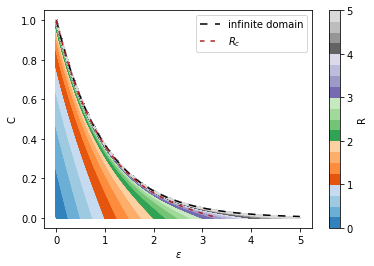

My program took 16.557875156402588 seconds to run


In [2]:
# This cell plots fig 2. It is a heatmap for different tissue lengths (R) that plots the concentration in time and 
# space. The solution for an infinite tissue and for R=Rcrit are added as dotted lines.

# Import libraries.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
from matplotlib.colors import LinearSegmentedColormap
import time
import matplotlib.cm as cm
# Start the timer to know how long the program took to run.
start_time = time.time()

# Function definition.

# This function calculates the morphogen concentration in an infinite tissue at the steady state using the analytic 
# solution previously reported.
def ss_infinite(x):
    return np.exp(-x)

# This function calculates the morphogen concentration in a finite tissue at the steady state using the analytic 
# solution presented in this work.
def ss_finite(x,R):
    return (np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))

steps = 1000
rrange = np.arange(0.001, 5,  0.001)
maxr = max(rrange)
Rcrit = 3.3

for rr in rrange:
    # xrange = np.array([i for i in xrange if i<=rr])
    xrange = np.arange(0, rr + rr/steps, maxr/steps)
    plt.plot(xrange, ss_finite(xrange, rr), color=cm.tab20c(rr/maxr))
plt.xlabel(r"$\epsilon$")
plt.ylabel("C")
#plt.legend()
norm = mplc.Normalize(vmin=0, vmax=5)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.tab20c))
cbar.set_label("R")

# Adds the solution for an infinite tissue as a dashed line.
# plt.plot(xrange, ss_infinite(xrange), color="black", ls="--", dashes=(1, 2), label="infinite domain", zorder=100000)
plt.plot(xrange, ss_infinite(xrange), color="black", ls="--", dashes=(5, 5), label="infinite domain", zorder=100000)
xrange = np.arange(0, Rcrit + Rcrit/steps, maxr/steps)
plt.plot(xrange, ss_finite(xrange, Rcrit), color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$", zorder=100050)
plt.legend()
plt.savefig("fig2.png", dpi=500)
plt.show()
plt.close()

print("My program took "+str(time.time() - start_time)+" seconds to run")